In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')

In [3]:
train_data.columns

Index(['id', 'age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'target'],
      dtype='object')

In [4]:
train_data.groupby(['race', 'sex']).mean()

id        age         fnlwgt  \
race               sex                                              
Amer-Indian-Eskimo Female   8721.885714  38.614286  126253.828571   
                   Male     8961.526316  38.063158  123449.463158   
Asian-Pac-Islander Female  10315.365482  35.401015  151437.309645   
                   Male     9571.000000  38.426735  171694.431877   
Black              Female   9202.054273  37.613164  214048.775982   
                   Male     8896.718900  37.498804  239637.965311   
Other              Female   9680.277778  31.305556  174661.458333   
                   Male     8401.516484  34.527473  203378.439560   
White              Female   8977.973319  36.741942  182440.401708   
                   Male     8509.615679  39.998821  189440.403281   

                           education.num  capital.gain  capital.loss  \
race               sex                                                 
Amer-Indian-Eskimo Female       9.657143    579.957143      0.000000   
                   Male         9.010526   1029.294737     36.442105   
Asian-Pac-Islander Female      10.375635   1180.035533     58.695431   
                   Male        11.167095   2000.043702    100.830334   
Black              Female       9.493072    598.374134     39.057737   
                   Male         9.349282    569.379187     93.771531   
Other              Female       8.902778    385.541667     54.930556   
                   Male         8.835165   1245.109890    103.703297   
White              Female      10.078975    547.578655     61.509925   
                   Male        10.100894   1372.454956     98.054524   

                           hours.per.week    target  
race               sex                               
Amer-Indian-Eskimo Female       36.400000  0.114286  
                   Male         44.115789  0.168421  
Asian-Pac-Islander Female       37.213198  0.096447  
                   Male         40.637532  0.300771  
Black              Female       37.000000  0.056582  
                   Male         40.028708  0.172249  
Other              Female       35.194444  0.069444  
                   Male         42.681319  0.109890  
White              Female       35.678762  0.117609  
                   Male         42.271932  0.313096

In [5]:
train_data['race_sex'] = train_data['race'].map(str)+'_'+train_data['sex']
test_data['race_sex'] = test_data['race'].map(str)+'_'+test_data['sex']

In [6]:
train_data.drop(['race', 'sex'], axis=1, inplace=True)
test_data.drop(['race', 'sex'], axis=1, inplace=True)

In [7]:
train_data.dropna(axis=0,subset=['workclass','occupation','native.country'],inplace = True)

In [8]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(train_data)

결측치가 존재하지 않습니다


In [9]:
drop_features = ['race', 'sex', 'native.country']
categorical_features = [col for col in train_data.columns if train_data[col].dtype == 'object' and col not in drop_features]
numerical_features = [col for col in train_data.columns if train_data[col].dtype == 'int64' and col not in drop_features]

age
SKEW: 0.531989264344362
KURT: -0.15440920019922322


C:\Users\LG\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LG\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


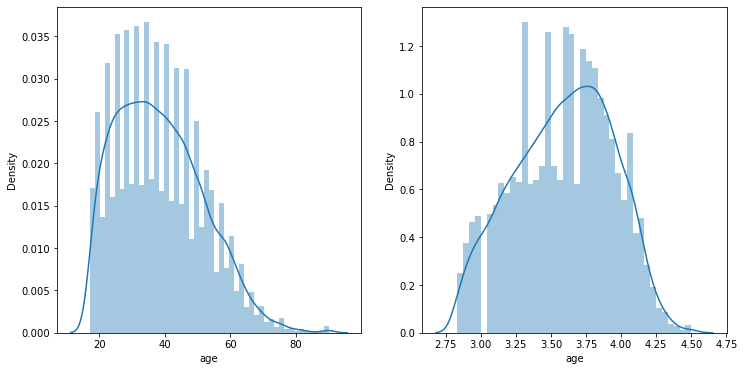

In [10]:
var = numerical_features[1]
print(var)
print('SKEW:',train_data[var].skew())
print('KURT:',train_data[var].kurt())
f, ax = plt.subplots(1,2,figsize=(12,6))
sns.distplot(train_data[var], ax=ax[0])
sns.distplot(np.log(train_data[var]), ax=ax[1])
train_data[f'log_{var}']=np.log(train_data[var])
test_data[f'log_{var}']=np.log(test_data[var])

fnlwgt
SKEW: 1.419886796778432
KURT: 6.294748517179814


C:\Users\LG\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LG\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


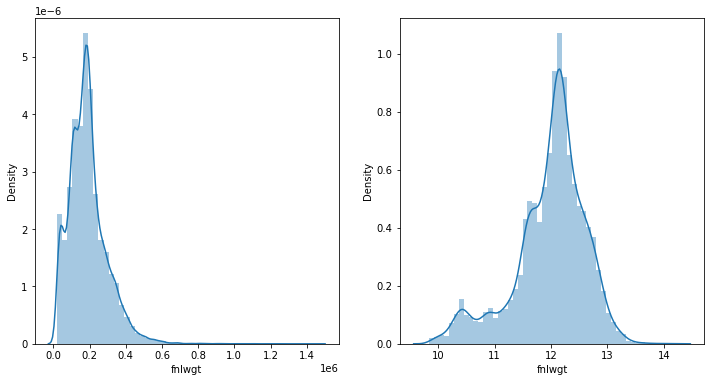

In [11]:
var = numerical_features[2]
print(var)
print('SKEW:',train_data[var].skew())
print('KURT:',train_data[var].kurt())
f, ax = plt.subplots(1,2,figsize=(12,6))
sns.distplot(train_data[var], ax=ax[0])
sns.distplot(np.log(train_data[var]), ax=ax[1])
train_data[f'log_{var}']=np.log(train_data[var])
test_data[f'log_{var}']=np.log(test_data[var])

education.num


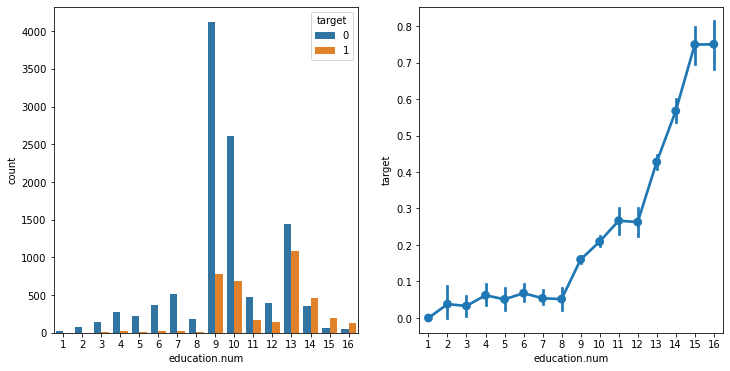

In [12]:
var = numerical_features[3]
print(var)
f, ax = plt.subplots(1,2,figsize=(12,6))
sns.countplot(x=var, hue='target', data=train_data, ax=ax[0])
sns.pointplot(y='target', x=var, data=train_data, ax=ax[1])
plt.show()

In [13]:
train_data['edu'] = 0
index = train_data[(train_data['education.num']==9) | (train_data['education.num']==10)].index
train_data.loc[index, 'edu'] = 1
index = train_data[(train_data['education.num']==11) | (train_data['education.num']==12)].index
train_data.loc[index, 'edu'] = 2
index = train_data[(train_data['education.num']>=13)].index
train_data.loc[index, 'edu'] = 3

test_data['edu'] = 0
index = test_data[(test_data['education.num']==9) | (test_data['education.num']==10)].index
test_data.loc[index, 'edu'] = 1
index = test_data[(test_data['education.num']==11) | (test_data['education.num']==12)].index
test_data.loc[index, 'edu'] = 2
index = test_data[(test_data['education.num']>=13)].index
test_data.loc[index, 'edu'] = 3

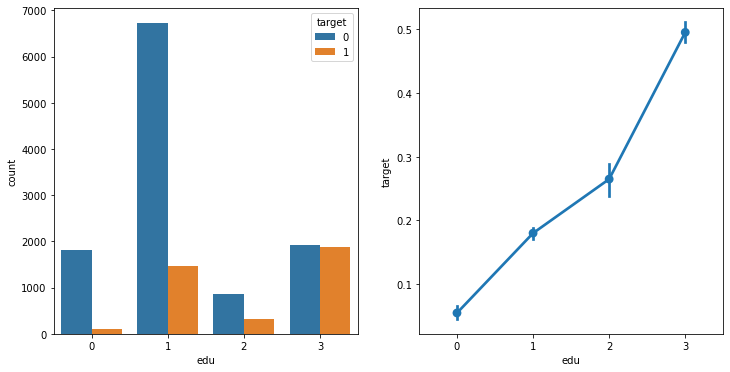

In [14]:
f, ax = plt.subplots(1,2,figsize=(12,6))
sns.countplot(x='edu', hue='target', data=train_data, ax=ax[0])
sns.pointplot(y='target', x='edu', data=train_data, ax=ax[1])
plt.show()

capital.gain
SKEW: 11.80395602774153
KURT: 150.75691721556066


C:\Users\LG\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LG\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


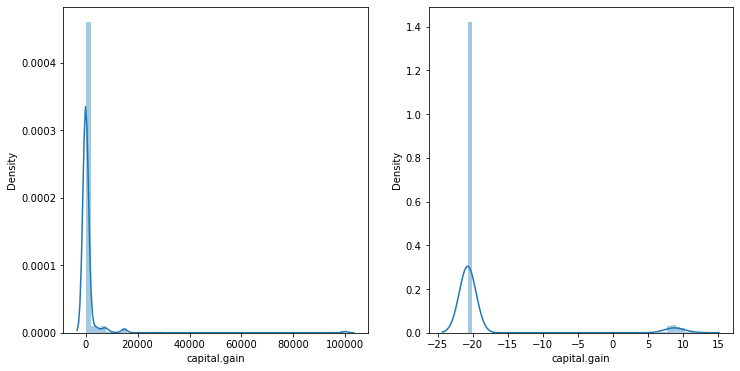

In [15]:
var = numerical_features[4]
print(var)
print('SKEW:',train_data[var].skew())
print('KURT:',train_data[var].kurt())
f, ax = plt.subplots(1,2,figsize=(12,6))
sns.distplot(train_data[var], ax=ax[0])
sns.distplot(np.log(train_data[var]+1e-9), ax=ax[1])
train_data[f'log_{var}']=np.log(train_data[var]+1e-9)
test_data[f'log_{var}']=np.log(test_data[var]+1e-9)

capital.loss
SKEW: 4.606832345235017
KURT: 20.3056469127438


C:\Users\LG\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LG\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


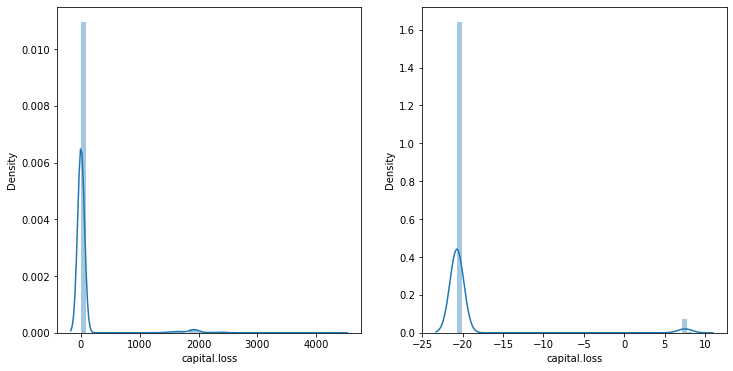

In [16]:
var = numerical_features[5]
print(var)
print('SKEW:',train_data[var].skew())
print('KURT:',train_data[var].kurt())
f, ax = plt.subplots(1,2,figsize=(12,6))
sns.distplot(train_data[var], ax=ax[0])
sns.distplot(np.log(train_data[var]+1e-9), ax=ax[1])
train_data[f'log_{var}']=np.log(train_data[var]+1e-9)
test_data[f'log_{var}']=np.log(test_data[var]+1e-9)

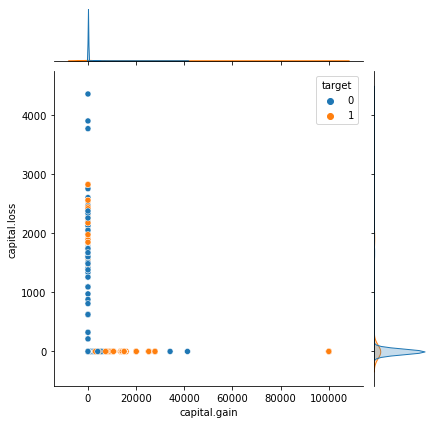

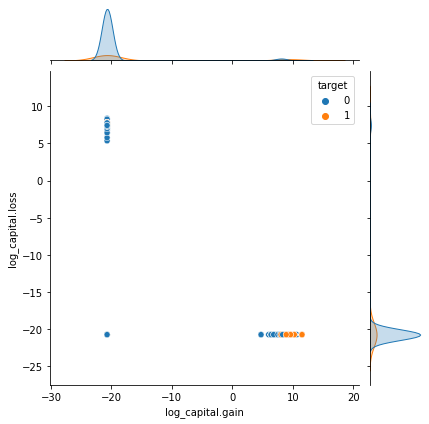

In [17]:
sns.jointplot(x="capital.gain", y="capital.loss", hue='target',data=train_data)
sns.jointplot(x="log_capital.gain", y="log_capital.loss", hue='target',data=train_data)
plt.show()

hours.per.week
MEAN: 40.920827531330815
STD: 12.018513206153386


C:\Users\LG\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LG\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


MEAN: 3.6557361109843023
STD: 0.37715877282623333


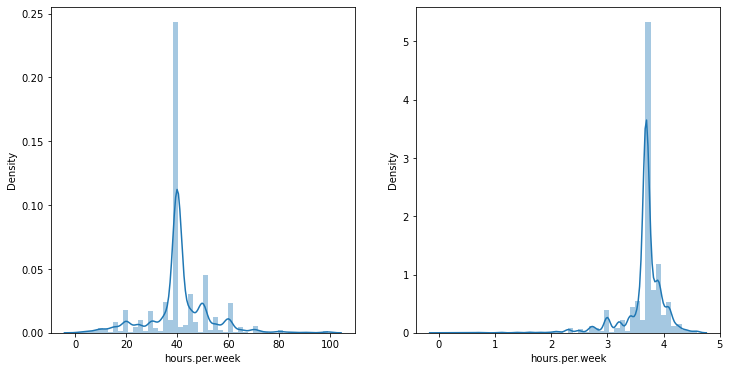

In [18]:
var = numerical_features[6]
print(var)
print('MEAN:',train_data[var].mean())
print('STD:',train_data[var].std())
f, ax = plt.subplots(1,2,figsize=(12,6))
sns.distplot(train_data[var], ax=ax[0])
sns.distplot(np.log(train_data[var]+1e-9), ax=ax[1])
train_data[f'log_{var}']=np.log(train_data[var]+1e-9)
test_data[f'log_{var}']=np.log(test_data[var]+1e-9)
print('MEAN:',train_data[f'log_{var}'].mean())
print('STD:',train_data[f'log_{var}'].std())

In [20]:
from sklearn.preprocessing import LabelEncoder

for var in categorical_features:
    le = LabelEncoder()
    le.fit(train_data[var])
    train_data[var] = le.transform(train_data[var])
    test_data[var] = le.transform(test_data[var])

In [22]:
from pycaret.classification import *
import scipy, sklearn, lightgbm, pycaret

In [23]:
exp = setup(data=train_data, 
            target='target',
            fold_shuffle=True,
            imputation_type='iterative',
            session_id = 42
           )

,Description,Value
0,session_id,42
1,Target,target
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(15081, 21)"
5,Missing Values,False
6,Numeric Features,17
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


AttributeError: 'Make_Time_Features' object has no attribute 'list_of_features'

In [24]:
best_model= compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8630,0.9208,0.6398,0.7794,0.7023,0.6146,0.6199,3.8600
lightgbm,Light Gradient Boosting Machine,0.8600,0.9184,0.6537,0.7597,0.7024,0.6116,0.6147,0.3680
xgboost,Extreme Gradient Boosting,0.8568,0.9170,0.6511,0.7503,0.6967,0.6036,0.6066,1.7020
gbc,Gradient Boosting Classifier,0.8552,0.9162,0.5807,0.7918,0.6694,0.5797,0.5914,1.2160
ada,Ada Boost Classifier,0.8499,0.9090,0.6001,0.7563,0.6689,0.5736,0.5802,0.4750
rf,Random Forest Classifier,0.8444,0.8977,0.6035,0.7349,0.6623,0.5626,0.5675,0.7150
et,Extra Trees Classifier,0.8304,0.8812,0.5882,0.6958,0.6368,0.5273,0.5309,0.7980
lda,Linear Discriminant Analysis,0.8147,0.8452,0.4654,0.7015,0.5587,0.4478,0.4632,0.1310
ridge,Ridge Classifier,0.8109,0.0000,0.3999,0.7307,0.5158,0.4110,0.4402,0.0400
dt,Decision Tree Classifier,0.8005,0.7402,0.6181,0.6033,0.6101,0.4762,0.4766,0.0770


In [25]:
cb = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8608,0.9192,0.6667,0.7542,0.7078,0.6168,0.6189
1,0.8608,0.9167,0.6479,0.7655,0.7018,0.6118,0.6155
2,0.8485,0.9128,0.5880,0.7585,0.6624,0.5668,0.5744
3,0.8617,0.9264,0.6105,0.7951,0.6907,0.6036,0.6124
4,0.8703,0.9226,0.6479,0.8009,0.7164,0.6335,0.6394
5,0.8769,0.9242,0.6791,0.8053,0.7368,0.6573,0.6613
6,0.8701,0.9296,0.6854,0.7754,0.7276,0.6428,0.6449
7,0.8645,0.9190,0.6367,0.7870,0.7039,0.6173,0.6231
8,0.8673,0.9275,0.6442,0.7926,0.7107,0.6258,0.6315
9,0.8493,0.9105,0.5918,0.7596,0.6653,0.5699,0.5773


In [26]:
tuned_cb = tune_model(cb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8580,0.9170,0.6629,0.7468,0.7024,0.6095,0.6114
1,0.8561,0.9094,0.6217,0.7650,0.6860,0.5939,0.5992
2,0.8428,0.9048,0.5768,0.7440,0.6498,0.5505,0.5579
3,0.8551,0.9183,0.5730,0.7969,0.6667,0.5772,0.5901
4,0.8617,0.9175,0.6292,0.7814,0.6971,0.6089,0.6149
5,0.8759,0.9201,0.6604,0.8157,0.7299,0.6505,0.6566
6,0.8673,0.9287,0.6667,0.7773,0.7177,0.6317,0.6348
7,0.8521,0.9127,0.6067,0.7606,0.6750,0.5809,0.5871
8,0.8664,0.9225,0.6217,0.8058,0.7019,0.6176,0.6262
9,0.8436,0.9081,0.5543,0.7629,0.6421,0.5452,0.5566


In [27]:
final_cb = finalize_model(tuned_cb)

In [28]:
pred = predict_model(final_cb, data=test_data)

In [29]:
submission = pd.read_csv('sample_submission.csv')
submission['target'] = pred['Label']
submission.to_csv('cat_boost_sub.csv', index=False)

In [ ]:
bag_catboost_50 = ensemble_model(final_cb, n_estimators=50, fold=10, optimize='AUC')

IntProgress(value=0, description='Processing: ', max=6)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:41:00
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
